<a href="https://colab.research.google.com/github/Seb207/Market-Context-Project/blob/main/Data_Management_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data_Management

***Required Functions***

- SQL DB Connection, Managing
- Data conversion
- Data labeling
- Data I/O
- Current DB status

Import Packages

In [30]:
import numpy as np
import pandas as pd
import psycopg2
from matplotlib import pyplot as plt

#SQL Connect & Setup

In [ ]:
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [51]:
!sudo service postgresql start

postgresql: unrecognized service


In [52]:
con = psycopg2.connect()

OperationalError: connection to server on socket "/var/run/postgresql/.s.PGSQL.5432" failed: No such file or directory
	Is the server running locally and accepting connections on that socket?


#Refinitiv Excel Data Import Test

In [33]:
NDX_D = pd.read_excel('/content/drive/MyDrive/코딩 프로젝트/Quant Program/Market_Context_Model/Data/Price History_NDX_2Y_D.xlsx', header=32, index_col=0, usecols='A,B,C,D,E,F,G,H')

In [34]:
NDX_D.head()

,Close,Net,%Chg,Open,Low,High,Volume
Exchange Date,,,,,,,
2025-07-25,23272.246,52.381,0.002256,23204.664,23193.991,23326.297,324941864
2025-07-24,23219.865,57.459,0.002481,23228.789,23150.267,23268.492,348237961
2025-07-23,23162.406,98.828,0.004285,23100.251,23000.459,23168.493,332209560
2025-07-22,23063.578,-116.484,-0.005025,23182.023,22953.850,23186.363,309160356
2025-07-21,23180.062,114.588,0.004968,23124.967,23122.934,23264.451,266396552


In [36]:
NDX_D.dropna()

,Close,Net,%Chg,Open,Low,High,Volume
Exchange Date,,,,,,,
2025-07-25,23272.246,52.381,0.002256,23204.664,23193.991,23326.297,324941864
2025-07-24,23219.865,57.459,0.002481,23228.789,23150.267,23268.492,348237961
2025-07-23,23162.406,98.828,0.004285,23100.251,23000.459,23168.493,332209560
2025-07-22,23063.578,-116.484,-0.005025,23182.023,22953.850,23186.363,309160356
2025-07-21,23180.062,114.588,0.004968,23124.967,23122.934,23264.451,266396552
...,...,...,...,...,...,...,...
2023-08-04,15274.915,-78.626,-0.005121,15420.739,15258.686,15523.314,285538412
2023-08-03,15353.541,-17.198,-0.001119,15287.773,15270.722,15436.591,246161240
2023-08-02,15370.739,-347.270,-0.022094,15561.148,15321.437,15561.357,305948970


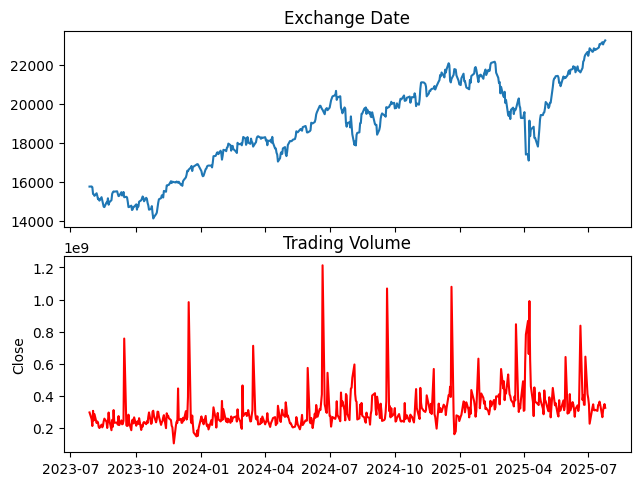

In [54]:
date = NDX_D.index
close = NDX_D['Close']
volume = NDX_D['Volume']

fig, ax = plt.subplots(2, 1, sharex=True)
#fig.subplots_adjust(hspace=1)
fig.tight_layout()

ax[0].plot(date, close)
ax[0].set_title('Exchange Date')
ax[1].plot(date, volume, 'r-')
ax[1].set_title('Trading Volume')
plt.ylabel('Close')
plt.show()